<a href="https://colab.research.google.com/github/Tagtshen/Computational-physics-Assignments-/blob/main/Copy_of_ASSIGNMENT_4_Tagtshen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1: Random number generation using Linear Congruential random Number generator

Execution time for LCG: 0.008500337600708008


<Figure size 1000x800 with 0 Axes>

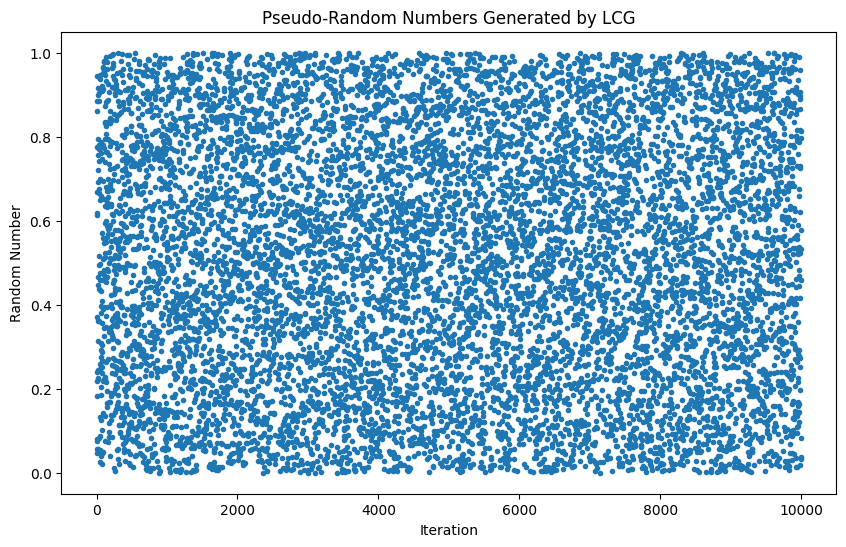

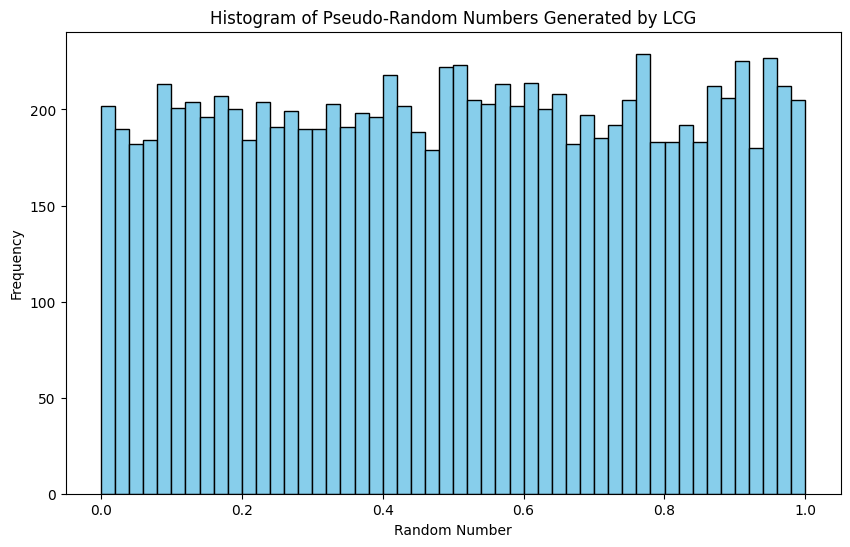

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
a=191293
b=139941249
m=934124814801
n= 10001
seed=235432
x_next=seed
start=time.time()
x_values=[]
for i in range(n):
 x_next=(a*x_next+b)%m
 x_values.append(x_next)
end=time.time()
execution_time= end-start

x_normalized=[x / m for x  in x_values] #normalised to create the random number between 0 and 1

print('Execution time for LCG:',execution_time)

plt.figure(figsize=(10,8))
plt.figure(figsize=(10, 6))
plt.plot(x_normalized[:10001], marker='.', linestyle='none') #plot of frist 100 random number
plt.title('Pseudo-Random Numbers Generated by LCG')
plt.xlabel('Iteration')
plt.ylabel('Random Number')

plt.figure(figsize=(10, 6))
plt.hist(x_normalized[:10000], bins=50, color='skyblue', edgecolor='black') # plot histogram of first 10000 random numbers
plt.title('Histogram of Pseudo-Random Numbers Generated by LCG')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()

plt.show()



QUESTION 2: Random nunber generation using np.random.rand()

execution time = 0.005298137664794922


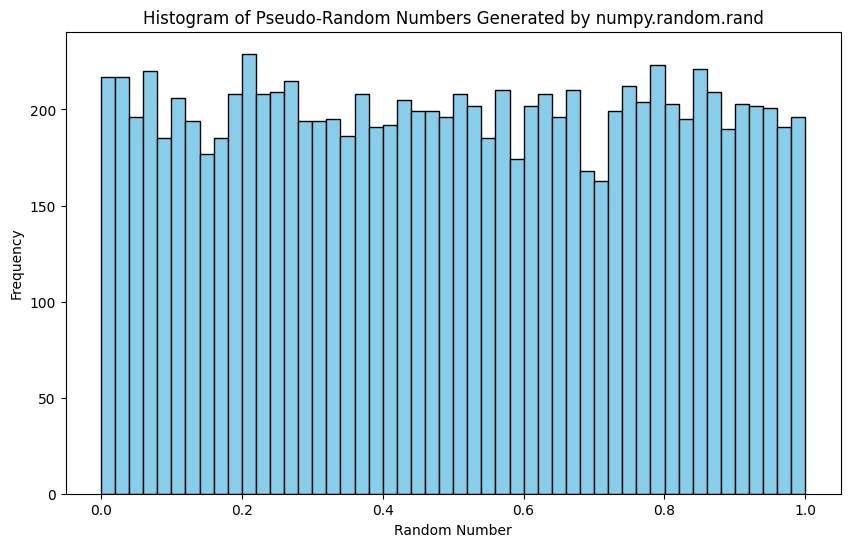

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
n=10000
start=time.time()
random=np.random.rand(n)
end=time.time()

print("execution time =",end-start)

plt.figure(figsize=(10, 6))
plt.hist(random[:10000], bins=50, color='skyblue', edgecolor='black') # plot histogram of first 10000 random numbers
plt.title("Histogram of Pseudo-Random Numbers Generated by numpy.random.rand")
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()



QUESTION 4: Transformation Method


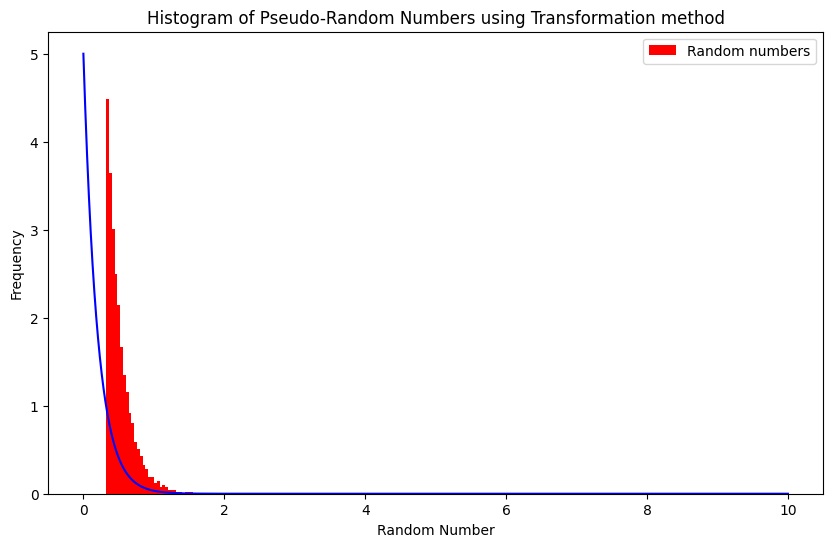

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Transformation(n):
  x1=np.random.rand(n)
  f=-mean*np.log(mean*x1)
  return f

def exp_(t):
  return (1/mean)*np.exp(-t/mean)

n=10000
mean=0.2
f=Transformation(n)
t=np.linspace(0,10,n)

plt.figure(figsize=(10, 6))
plt.hist(f,bins=50,density= True,color='RED',label='Random numbers')

plt.legend()

plt.title("Histogram of Pseudo-Random Numbers using Transformation method")
plt.plot(t,exp_(t),color='BLUE',label='Gaussian function')
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()







QUESTION 5: Box muller method

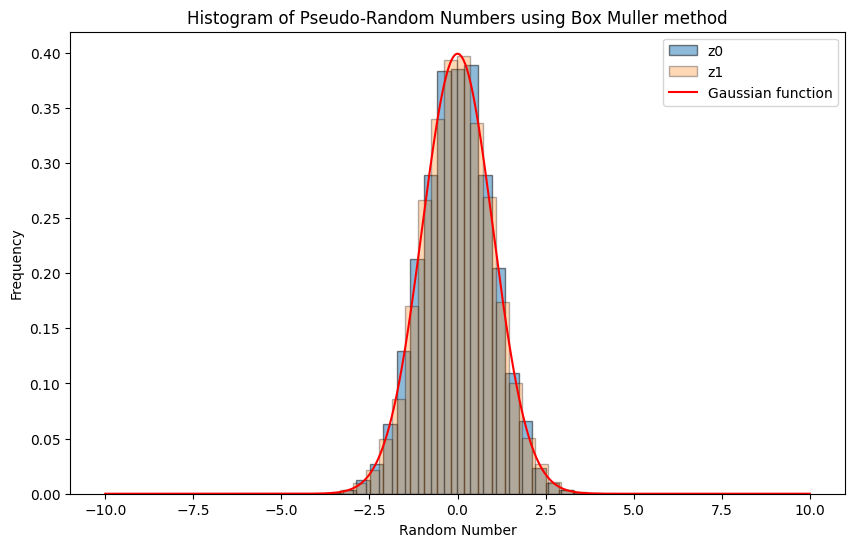

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def BOX_MULLER(n):
  x1=np.random.rand(n)
  x2=np.random.rand(n)
  z0=np.sqrt(-2*np.log(x1))*np.cos(2*np.pi*x2)
  z1=np.sqrt(-2*np.log(x1))*np.sin(2*np.pi*x2)
  return z0,z1

def gaussian_(t):
  return (1/(np.sqrt(np.pi*2)))*np.exp(-(t**2)/2)


n=10000
z0,z1=BOX_MULLER(n)
t=np.linspace(-10,10,n)

plt.figure(figsize=(10, 6))
plt.hist(z0, bins=20,density=True,alpha=0.5, edgecolor='black',label='z0')
plt.hist(z1, bins=20,density=True,alpha=0.3, edgecolor='black',label='z1')
plt.plot(t,gaussian_(t),color='RED',label='Gaussian function')
plt.legend()

plt.title("Histogram of Pseudo-Random Numbers using Box Muller method")
plt.xlabel('Random Number')
plt.ylabel('Frequency')
plt.show()







QUESTION 6: Rejection method


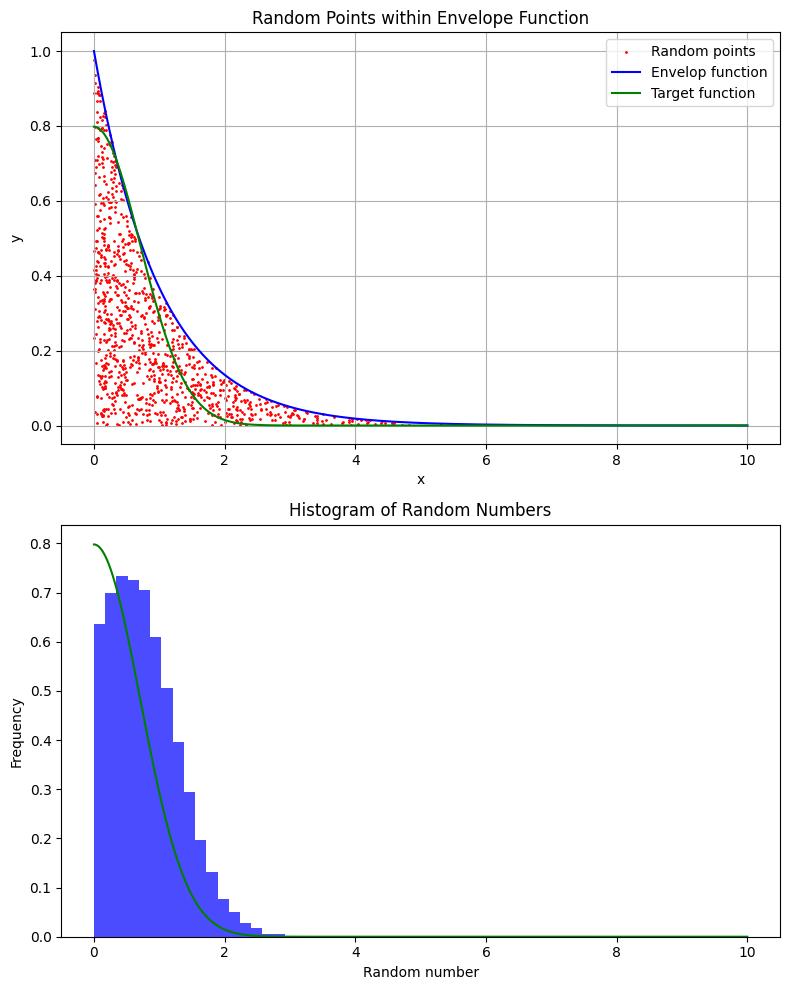

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def envelop_(m):
     return np.exp(-m)

def target_(t):
     return np.sqrt(2/np.pi)*np.exp(-t**2)

def generate_random(n):
  points=[]
  random=[]
  while len(points)<n :
        x=np.random.uniform(0,10)
        y=np.random.uniform(0,10)
        u=np.random.uniform(0,1)
        if y<=envelop_(x):
          points.append((x,y))
        if u<=target_(x)/envelop_(x):
          random.append(x)
  return points,random

n=1000
points,random=generate_random(n)
m=np.linspace(0,10,n)
t=np.linspace(0,10,n)
x_val,y_val=zip(*points)
# random= random_numbers(n)
# print(random)
plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.scatter(x_val,y_val,color='red',s=1,label='Random points')
plt.plot(m,envelop_(m),color='blue',label='Envelop function')
plt.plot(t,target_(t),color='green',label='Target function')
# plt.axvline(x=0,color='black',linestyle='--')
# plt.axhline(y=0,color='black',linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random Points within Envelope Function')

plt.grid(True)


plt.subplot(2,1,2)
plt.hist(random,bins=20,density=True,color='blue',alpha=0.7)
plt.plot(t,target_(t),color='green',label='Target function')
plt.xlabel('Random number')
plt.ylabel('Frequency')
plt.title('Histogram of Random Numbers')
plt.tight_layout()
plt.show()

In [ ]:
Question 6: Chi ^2 Test

The value of Chi square stastic for Observed count I = 29.491666666666667
The value of Chi square stastic for Observed count II= 1.1416666666666666
The probability of V1 being  29.491666666666667 is 0.0010368888967215995
The probability of V2 being  1.1416666666666666 is 0.999685063315782
The check for randomness for V1 =  29.491666666666667  is  Not sufficiently random
The check for randomness for V2 =  1.1416666666666666  is  Not sufficiently random


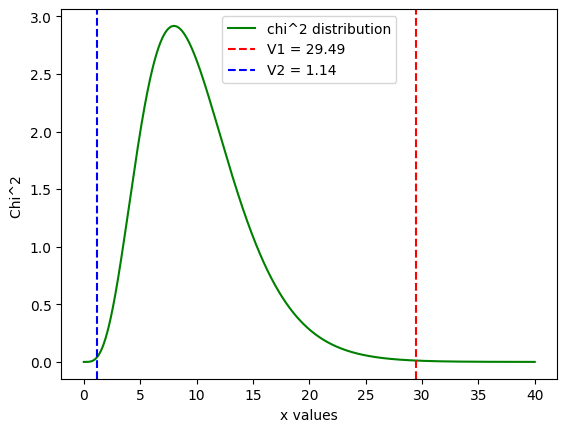

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import gamma

def chi_square(x,k):
  return (1/((2**(1/k))*gamma(k/2)))*x**(k/2-1)*np.exp(-x/2)

m=11 # total no of outcomes
k=11-1 # degrees of freedom
n= 144 #no of times two pair of dice were thrown
x=np.linspace(0,40,1000)
Observed_counts1=[4,10,10,13,20,18,18,11,13,14,13]
Observed_counts2=[3,7,11,15,19,24,21,17,13,9,5]

# Observed_counts3=[9,6,14,10,20,22,17,13,21,10,2]

expected_count=[4,8,12,16,20,24,20,16,12,8,4]
P=[1/36,1/18,1/12,1/9,5/36,1/6,5/36,1/9,1/12,1/18,1/36]

V1=0
V2=0
for i in range(m):
  V1=V1+((Observed_counts1[i]-n*P[i])**2)/(n*P[i])
  V2=V2+((Observed_counts2[i]-n*P[i])**2)/(n*P[i])

print('The value of Chi square stastic for Observed count I =',V1)
print('The value of Chi square stastic for Observed count II=',V2)

Constant_V1=np.ones(len(x))*V1
Constant_V2=np.ones(len(x))*V2

P_value_V1=1-scipy.stats.chi2.cdf(V1,k)
P_value_V2=1-scipy.stats.chi2.cdf(V2,k)

print('The probability of V1 being ',V1 ,'is',P_value_V1)
print('The probability of V2 being ',V2 ,'is',P_value_V2)

def check_randomness(P_value):
  if P_value <0.01 or P_value>0.99:
    return "Not sufficiently random"
  if 0.01 < P_value <0.05 or 0.95 < P_value <0.99 :
    return "Suspect"
  if 0.05 < P_value <0.1 or 0.90 < P_value <0.95 :
    return "Almost suspect"
  if 0.1< P_value <0.9:
    return "Sufficiently random"

randomness_1 = check_randomness(P_value_V1)
randomness_2 = check_randomness(P_value_V2)

print('The check for randomness for V1 = ',V1,' is ',randomness_1)
print('The check for randomness for V2 = ',V2,' is ',randomness_2)


plt.plot(x,chi_square(x,k),color='Green',label='chi^2 distribution')
plt.axvline(V1, color='red', linestyle='--', label=f'V1 = {V1:.2f}')
plt.axvline(V2, color='blue', linestyle='--', label=f'V2 = {V2:.2f}')
plt.xlabel("x values")
plt.ylabel("Chi^2 ")
plt.legend()
plt.show()

In [ ]:
Question 8 : Area of circle with unit radius, using Monte Carlo integration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



